# Data Augmentation
A common problem is the amount of data available to enter the models, for these to present the expected results it is necessary that the training occurs with a large amount of data (dataset), but in many cases there is no the data needed to perform these tasks.
This is where the ** Data Augmentation ** technique comes in, which, as its name indicates, allows us to augment our dataset in two ways:



* Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, inverting axes ...
* Using different distributions. Example: if we want to train a model to classify high resolution images, we add low resolution images, with noise… always maintaining the highest proportion of high resolution.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

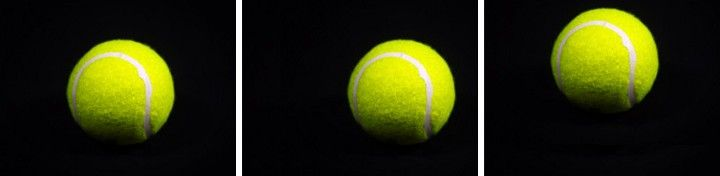



The same ball with some translations


So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1. Turn (Flip)
2. Rotation

1. Scale
2. Trim

1. Translation
2. Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



* The changes in the image (translations) through the arguments ** width_shift_range ** and ** height_shift_range **.
* Flip the image using the ** horizontal_flip ** and ** vertical_flip ** arguments.
* Rotations of images through the argument ** rotation_range **
* Image brightness using the ** brightness_range ** argument.
* Image zoom using the ** zoom_range ** argument.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.

In [29]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement 
from numpy import expand_dims      #Expand the array shape
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array # will take a picture (PIL) and convert it to an array. If part of a PNG image, the values ​​within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #class that takes original data, transforms it randomly and returns only the new transformed data
from PIL import Image #python image library
from urllib.request import urlopen #Lets read an email address

First we upload an image from the internet

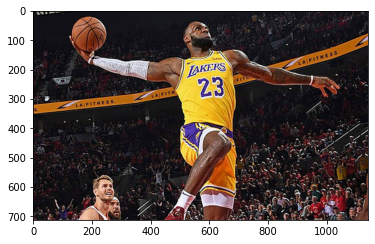

In [30]:
url = 'https://www.blogdebasket.com/files/lebron-james-los-angeles-lakers.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.

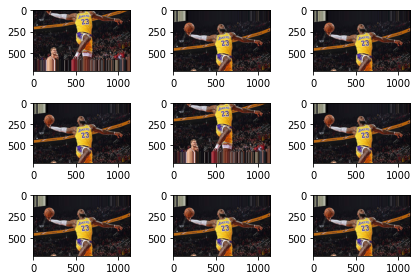

In [31]:
# We convert the image to an arrangement
data = img_to_array(img)
# we expand to a sample
samples = expand_dims(data, 0)
# We create the data augmenter using only image change
datagen = ImageDataGenerator(height_shift_range=[-125,125])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and display the results
for i in range(9):
	plt.subplot(330 + 1 + i)
# batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8')# is converted to a valid value so that it can be displayed as an image
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The magnification is specified by a Boolean argument ** horizontal_flip ** or ** vertical_flip ** for the ** ImageDataGenerator ** class.

Generate batches of tensor image data with real-time data augmentation.

The data will be looped over (in batches).

Arguments

*featurewise_center: Boolean. Set input mean to 0 over the dataset, feature-wise.

*samplewise_center: Boolean. Set each sample mean to 0.
featurewise_std_normalization: Boolean. Divide inputs by std of the dataset, feature-wise.

*samplewise_std_normalization: Boolean. Divide each input by its std.

*zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.

*ca_whitening: Boolean. Apply ZCA whitening.

*rotation_range: Int. Degree range for random rotations.

*width_shift_range: Float, 1-D array-like or int - float: fraction of total 
width, if < 1, or pixels if >= 1. - 1-D 

*array-like: random elements from the array. - int: integer number of pixels from interval (-width_shift_range, +width_shift_range) - 

*With width_shift_range=2 possible values are integers [-1, 0, +1], same as with width_shift_range=[-1, 0, +1], while with 
width_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).

*height_shift_range: Float, 1-D array-like or int - 

float: fraction of total height, if < 1, or pixels if >= 1. - 1-D array-like: random elements from the array. - 

*int: integer number of pixels from interval (-height_shift_range, +height_shift_range) - With height_shift_range=2 possible values are integers [-1, 0, +1], same as with height_shift_range=[-1, 0, +1], while with height_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).
brightness_range: 

*tuple or list of two floats. Range for picking a brightness shift value from.

*shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)

*zoom_range: Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
channel_shift_range: Float. Range for random channel shifts.

*fill_mode: One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'. Points outside the boundaries of the input are filled according to the given mode: - 'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k) - 'nearest': aaaaaaaa|abcd|dddddddd - 'reflect': abcddcba|abcd|dcbaabcd - 'wrap': abcdabcd|abcd|abcdabcd

*cval: Float or Int. Value used for points outside the boundaries when fill_mode = "constant".

*horizontal_flip: Boolean. Randomly flip inputs horizontally.

*vertical_flip: Boolean. Randomly flip inputs vertically.

*rescale: rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).

*preprocessing_function: function that will be applied on each input. The function will run after the image is resized and augmented. The function should take one argument: one image (Numpy tensor with rank 3), and should output a Numpy tensor with the same shape.

*validation_split: Float. Fraction of images reserved for validation (strictly between 0 and 1).

*dtype: Dtype to use for the generated arrays.

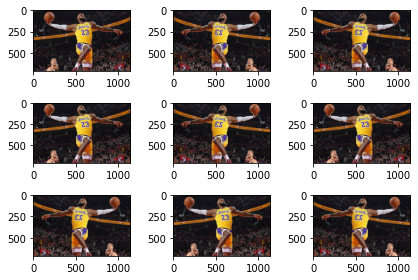

In [32]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

*Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]
directory: string, path to the target directory. It should contain one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside each of the subdirectories directory tree will be included in the generator. See this script for more details.

*target_size: Tuple of integers (height, width), defaults to (256, 256). The dimensions to which all images found will be resized.

*color_mode: One of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.

*classes: Optional list of class subdirectories (e.g. ['dogs', 'cats']). Default: None. If not provided, the list of classes will be automatically inferred from the subdirectory names/structure under directory, where each subdirectory will be treated as a different class (and the order of the classes, which will map to the label indices, will be alphanumeric). The dictionary containing the mapping from class names to class indices can be obtained via the attribute class_indices.

*class_mode: One of "categorical", "binary", "sparse", "input", or None. Default: "categorical". Determines the type of label arrays that are returned: - "categorical" will be 2D one-hot encoded labels, - "binary" will be 1D binary labels, "sparse" will be 1D integer labels, - "input" will be images identical to input images (mainly used to work with autoencoders). - If None, no labels are returned (the generator will only yield batches of image data, which is useful to use with model.predict()). Please note that in case of class_mode None, the data still needs to reside in a subdirectory of directory for it to work correctly.

*batch_size: Size of the batches of data (default: 32).
shuffle: Whether to shuffle the data (default: True) If set to False, sorts the data in alphanumeric order.

*seed: Optional random seed for shuffling and transformations.
save_to_dir: None or str (default: None). This allows you to optionally specify a directory to which to save the augmented pictures being generated (useful for visualizing what you are doing).

*save_prefix: Str. Prefix to use for filenames of saved pictures (only relevant if save_to_dir is set).

*save_format: One of "png", "jpeg" (only relevant if save_to_dir is set). Default: "png".

*follow_links: Whether to follow symlinks inside class subdirectories (default: False).

*subset: Subset of data ("training" or "validation") if validation_split is set in ImageDataGenerator.

*interpolation: Interpolation method used to resample the image if the target size is different from that of the loaded image. Supported methods are "nearest", "bilinear", and "bicubic". If PIL version 1.1.3 or newer is installed, "lanczos" is also supported. If PIL version 3.4.0 or newer is installed, "box" and "hamming" are also supported. By default, "nearest" is used.

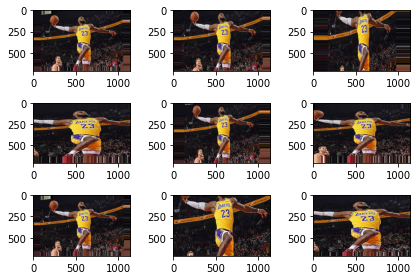

In [33]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

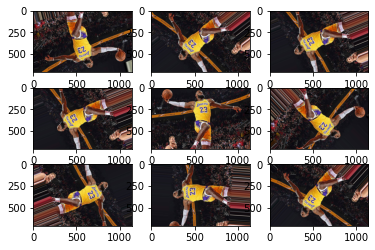

In [34]:
datagen = ImageDataGenerator(rotation_range=360)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.


              featurewise_center: Boolean, set the mean of each element to zero of all data.
              samplewise_center**: Bolean, to set the mean of each sample to zero
              featurewise_std_normalization: Boolean, Divide the entries by the standard deviation (std.) Of the data set, based on the characteristics.

              samplewise_std_normalization: Boleano, divide each data by its std.
              zca_epsilon: The default is 1e-6.
              zca_whitening:Boolean, indicates if ZCA bleaching is applied.     

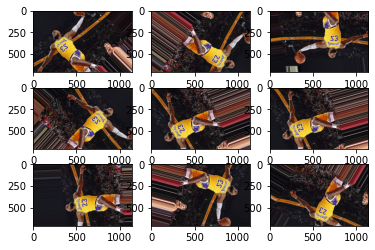

In [35]:
datagen = ImageDataGenerator(
            rotation_range               = 160,
            width_shift_range            = [120,120],   
            height_shift_range           = [120,120],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following:


1. Text Attack
2. Google Trans



# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [36]:
!pip install textattack

In [37]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

In [38]:
text = "Great things never come from comfort zones"

TextAttack provides us with four methods for data augmentation.


## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.


In [39]:
aug = WordNetAugmenter();
aug.augment(text)

['cracking things never come from comfort zones']


## EmbeddingAugmenter
 Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.

In [40]:
aug = EmbeddingAugmenter();
aug.augment(text)

['Magnificent things never come from comfort zones']

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [41]:
aug = CharSwapAugmenter()
aug.augment(text)

['Great things nevr come from comfort zones']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [42]:
aug = EasyDataAugmenter()
aug.augment(text)

['Great things never come comfort zones',
 'Great things never come zone from comfort zones',
 'Great zones never come from comfort things',
 'Great matter never come from comfort zones']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the ** translate () ** method are:



1. ** src **: source language. this parameter is optional as ** googletrans ** will detect it.
2. ** dest **: target language. Mandatory parameter.

1. ** text **: the text to be translated from the source language to the target language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

The supported languages ​​can be consulted at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.

Some examples of languages:


* Afrikaans 'af'

* Chinese (simplified) 'zh-CN or zh'

* Esperanto 'eo'

* Japanese 'ha'
* Latin 'la'


*   Spanish people'


* Turkmen 'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [43]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 972kB 8.6MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 102kB 12.1MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=d8542e56567b426e3a7dd27123197561610fbfdf3cf1f051db95fd40cb02b637
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=55168e74efaefede7db09d74269f24b80b36a6713ea6894120858fb5e5f97a9b
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [45]:
from googletrans import Translator
translator = Translator()

In [46]:
origin_text = "Great things never come from comfort zones"
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Great things never come from comfort zones
Izinto ezinhle azikaze zivele ezindaweni ezinethezekile
Good things have never happened in luxury
